# 📘 Support Vector Machines (SVM)

---

## 📌 1. Maximum Margin Classifier (Hard Margin SVM)

### 🔍 Intuition

- Imagine you want to separate two classes using a straight line (in 2D).
- There are **infinite possible lines** that can separate the two classes.
- **Maximum Margin Classifier** selects the line that **maximizes the distance (margin)** between the line and the **closest points** from each class (called **support vectors**).

### 📐 Visualization


- Margin = Distance between the separating hyperplane and the closest data points

### 🧠 Objective Function

Given data:  
$$ ( \mathbf{x}_i \in \mathbb{R}^n ), labels ( y_i \in \{-1, 1\} ) $$

Find:

- $( \mathbf{w} ): weights $
- $( b ): bias$

Maximize the margin:
$$
[
\text{Minimize } \frac{1}{2} ||\mathbf{w}||^2 \quad \text{subject to } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1
]
$$
---

In [6]:
 # Class +1       Margin         Class -1
 #    o              |              x
 #    o              |              x
 #    o      -----------------      x
 #    o              |              x
 #    o              |              x


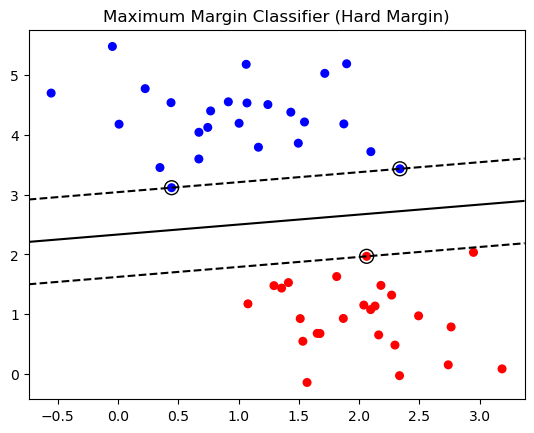

In [14]:
# Note: This is an ideal case (linearly separable), using `SVC(kernel='linear', C=1e10)` to simulate hard-margin behavior.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Generate linearly separable data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
y = 2*y - 1  # Convert labels from (0,1) to (-1,1)

# Fit hard-margin SVM
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

# Plot the decision boundary and margins
def plot_svm_decision_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.title("Maximum Margin Classifier (Hard Margin)")
    plt.show()

plot_svm_decision_boundary(model, X, y)


# HyperPlane
In an N-Dimensional space, a hyperplane is a flat affine subspace of hyperplane dimension of <code>N-1</code>

- For Example -
  * <code> 1-D Hyper plane is a single point </code>
  * <code> 2-D Hyperplane is a line </code>
  * <code> 3-D Hyperplane is flat plane </code>
  
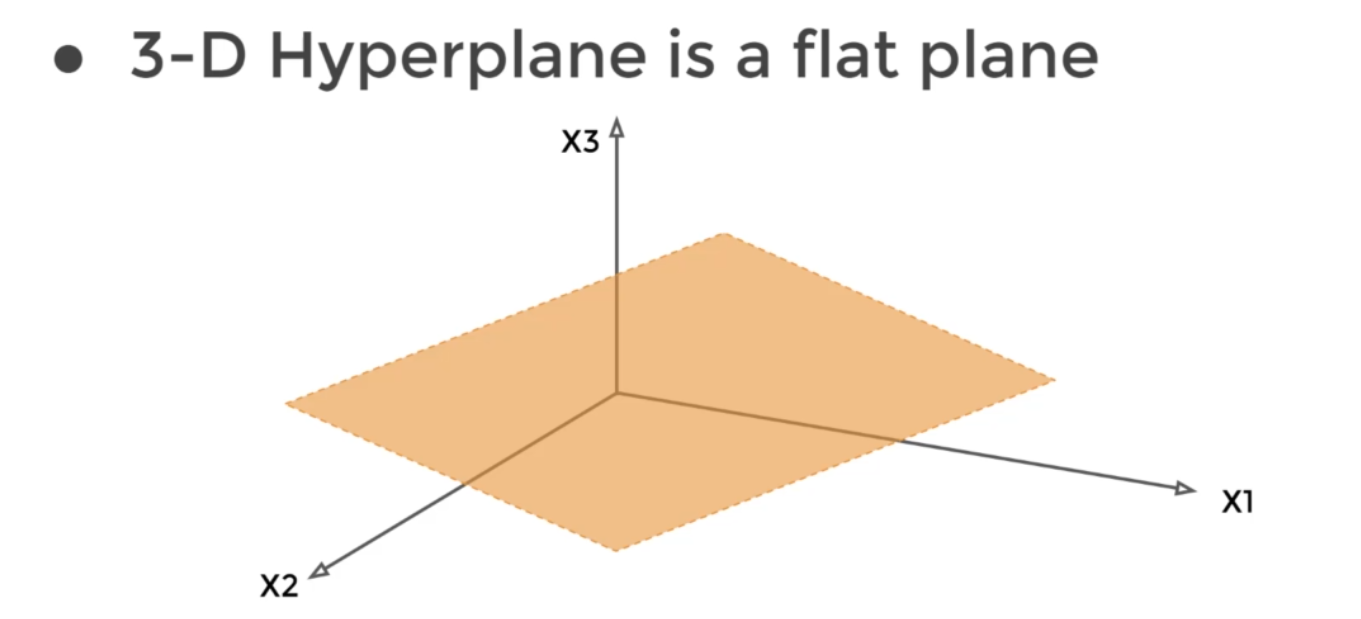

---
* The main idea behind SVM is that we can use Hyperplanes to create a separation between classes.
* Then new points will fall on one side of this separating hyperplane, which we can then use to assign a class.
* Imagine a data set with one feature and one binary target label.

- For Example -
  * A weight feature for baby chicks
  * Classified by Male or Female

* What would look like visualized ?
* Notice in this case, classes are perfectly separable. This is unlikely in real world datasets.
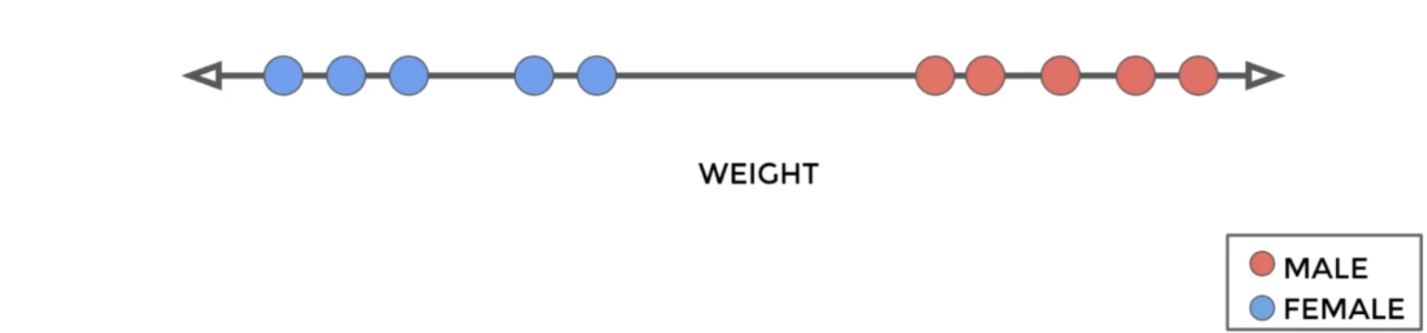
---
* Idea behind SVM is to create a <code>separating hyperplane</code> between the classes.
* A new point would be classified based on what side the point they land on.
* How do we choose where to put this separating hyperplane?
* Note there are many options that perfectly separate out these classes:
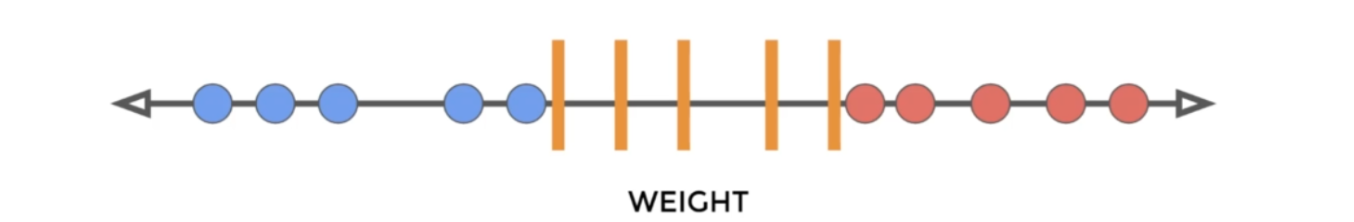
---
* We could use the separator that maximized the margins between the classes.
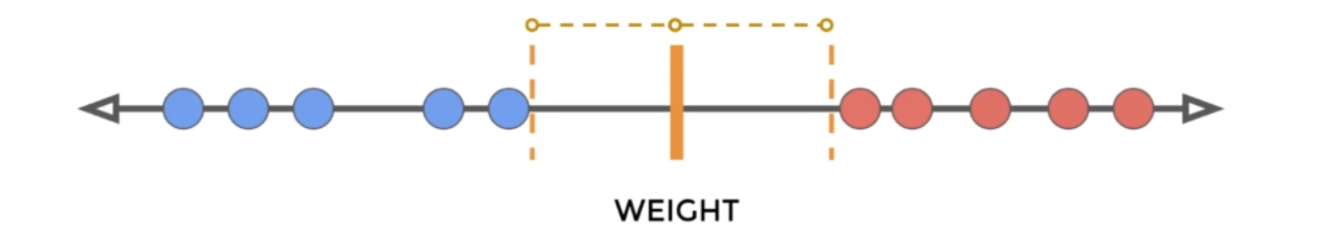

---
* This is knows as a <code> Maximal Margin Classifier </code>
* This same idea of maximum margins applies to N-Dimensions.


* Imagine a <code> 2-Dimensional </code> feature space:
* <code>Separating Hyperplane is a line </code>
* Multiple possible hyperplances can be shown as belows
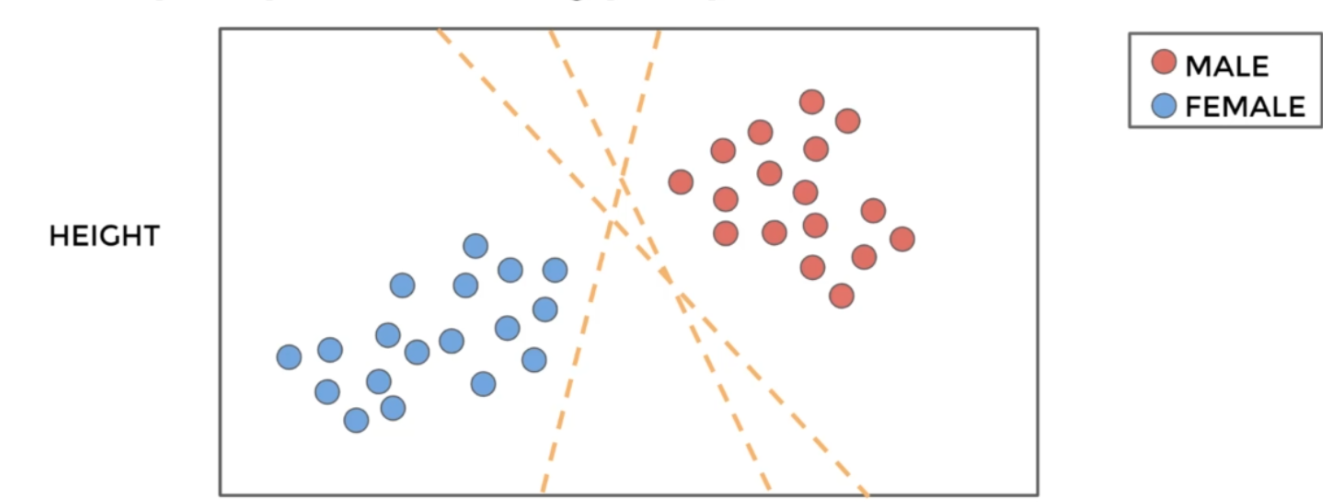

---
* Choose to maximize the margine
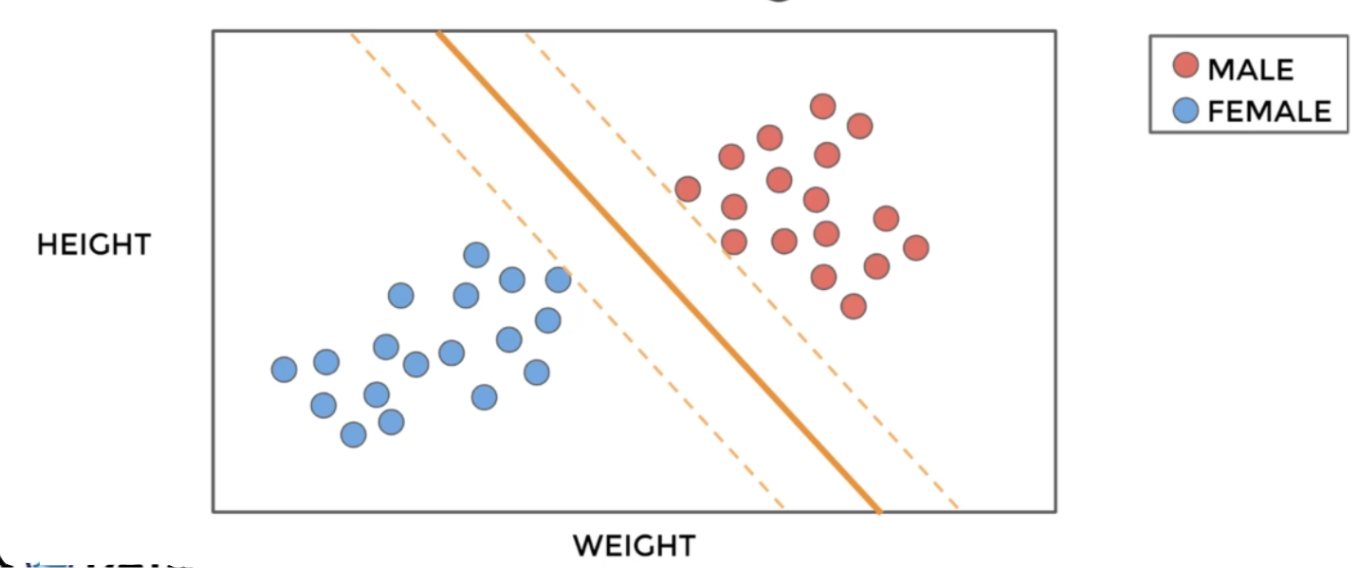
---
* Note each data point is a 2D Vector:
* Data poits at margin <code>"support"</code> separator:
* What happens if classes are not perfectly separable ?
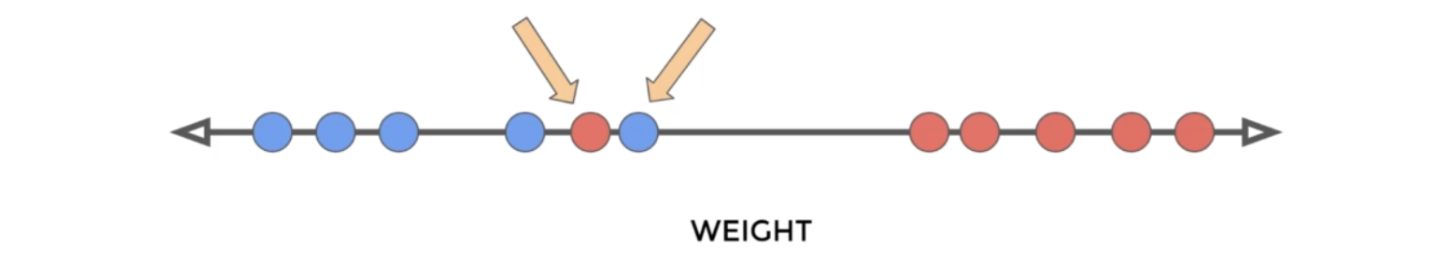
---
* We are not able to separate without allowing for misclassifications.
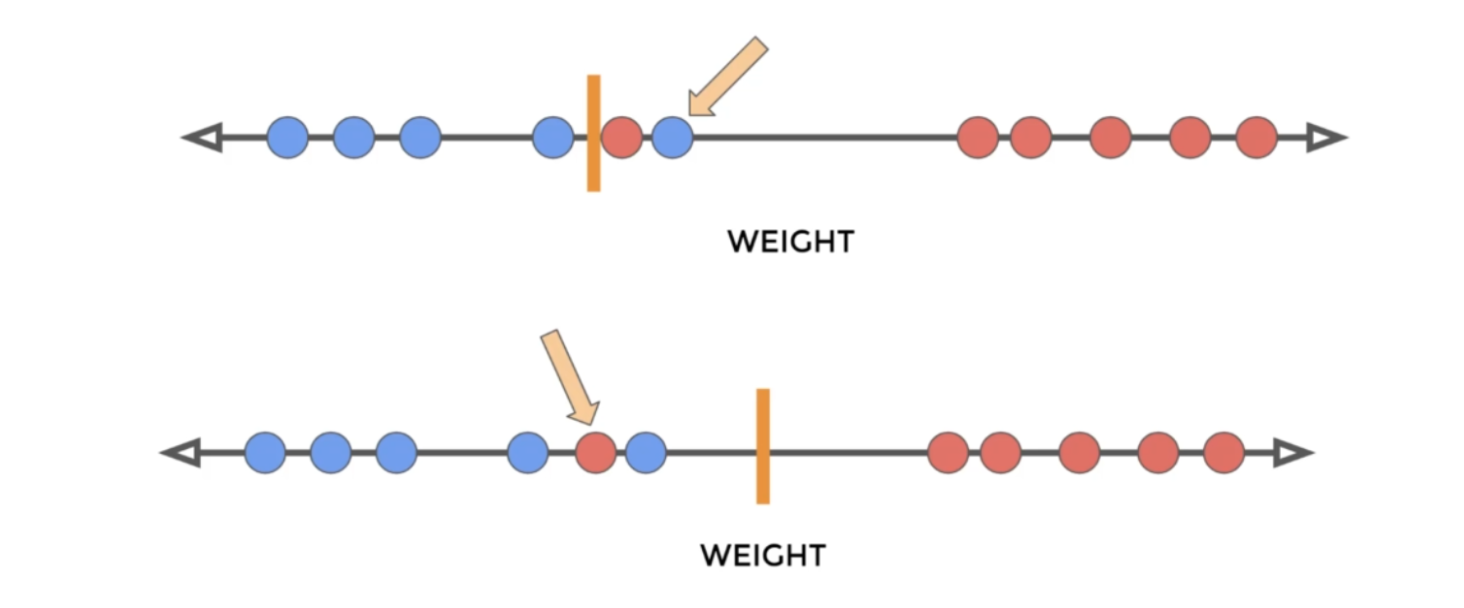
* We will have a <code>bias-variance trade-off</code> depending where we place this separator:
* For one feature this classifier creates ranges for male and female:
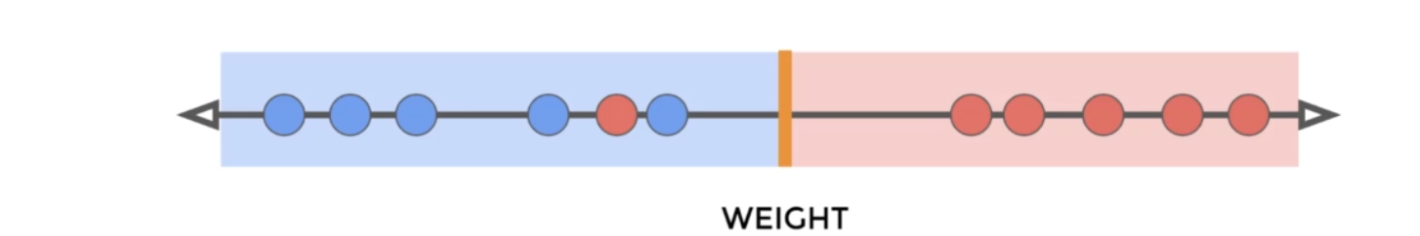
---
* This fit only misclassified one female training point as male:
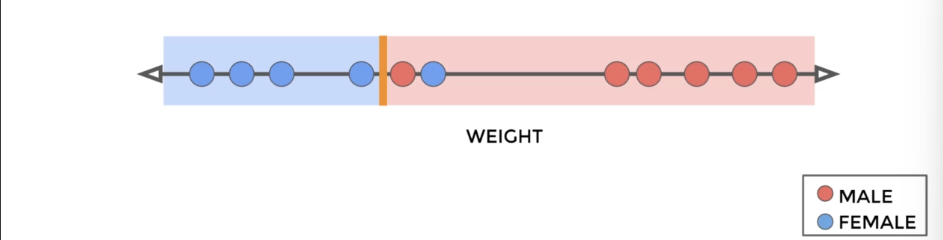
* This look like a high variance fit to training data, picking too much noise from Female:
* A new test point close to existing female weights could get classified as male:
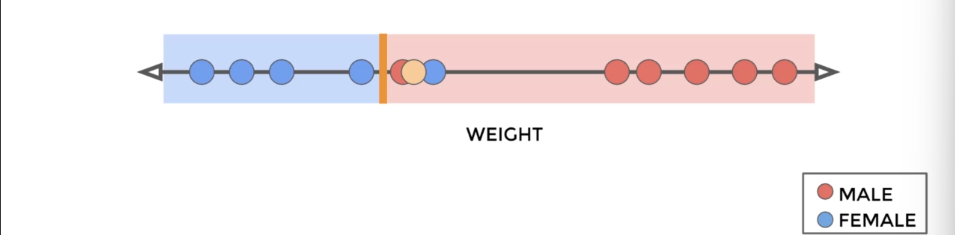

---
* We will have a <code>bias-variance trade-off</code> depending where we place this separator:
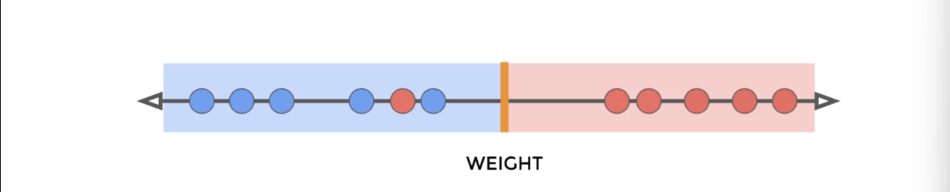

* Here we allow more bias to bead to better long term results on future data:
* Distance between threshold and the observations is a soft margin
* A soft margin allow for misclassification inside the margines.

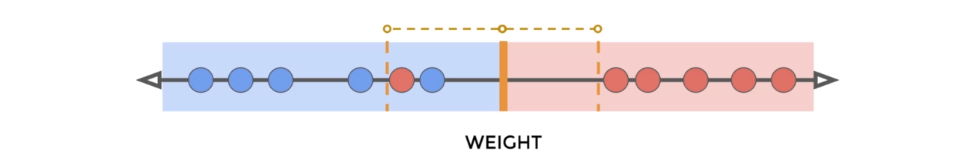

* There are many possible threshold splits if we allow for soft margins.
* We can use cross validation to determine the optimal size of the margins.


* <code>2D Soft margin Example</code>
* Dataset is technically perfectly separable 
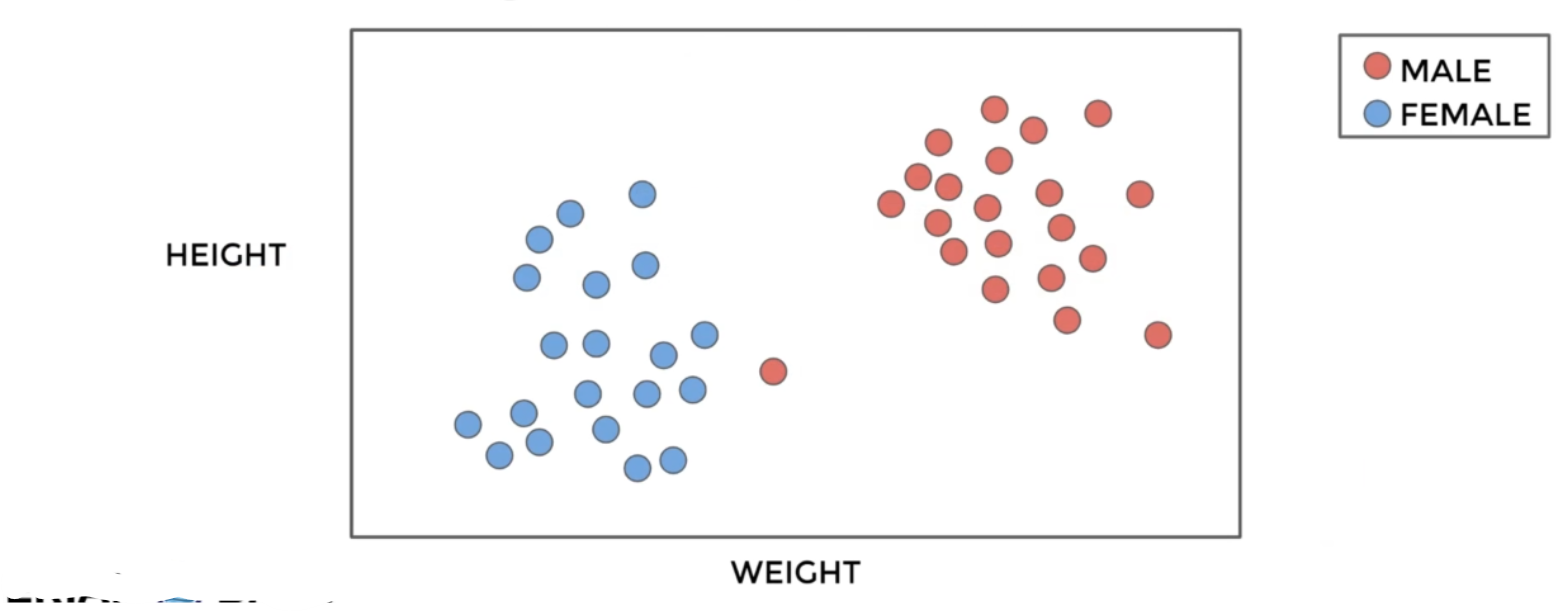
---

* Maximal Margin Classifier
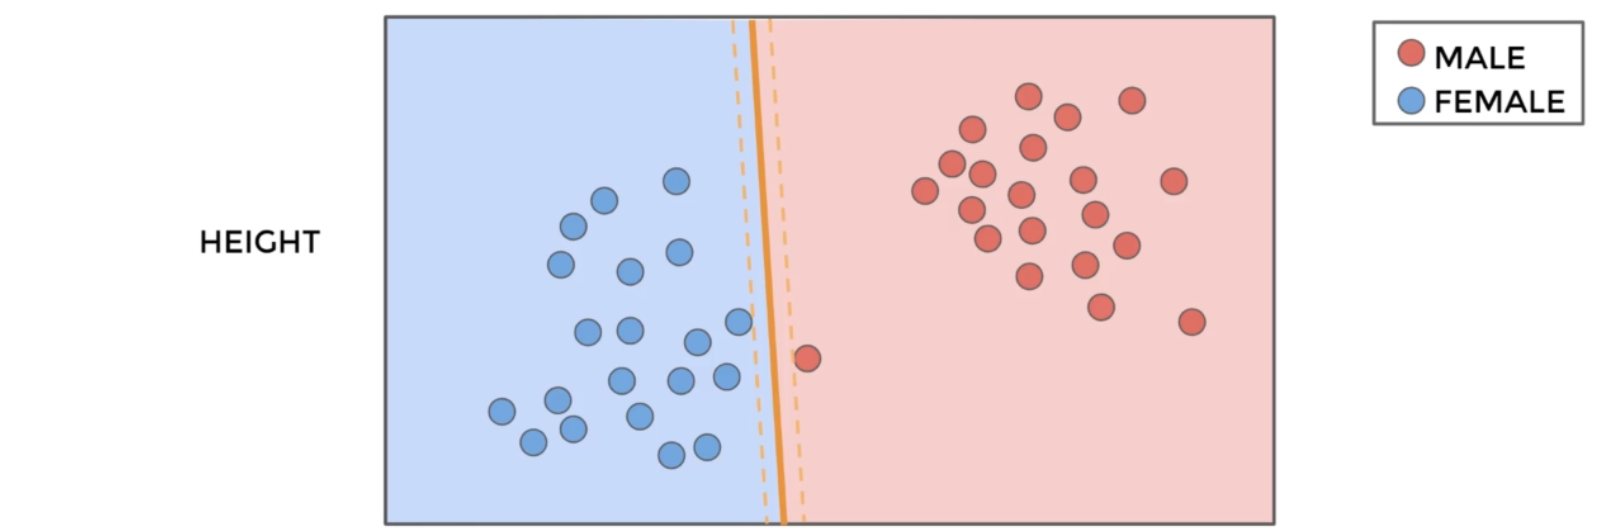
---

* Support Vector Classifier (Soft Margin)
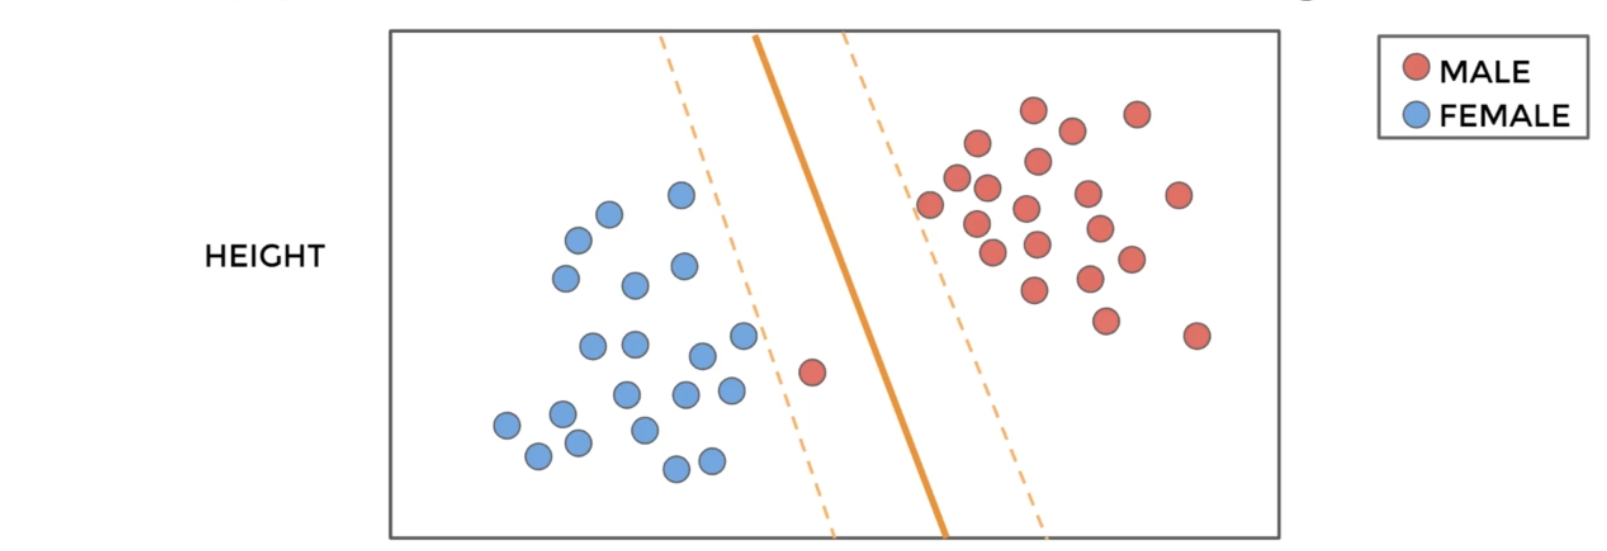

* We have only visualized cases where the classes are easily separated by the hyperplane in the original feature space.
* Allowing for some misclassifications still resulted in reasonable results.
* What would happen in a case where a hyperplane performs poorly, even when allowing for misclassifications ?
* Notice a single hyperplane won't separate out the classes without any misclassifications!

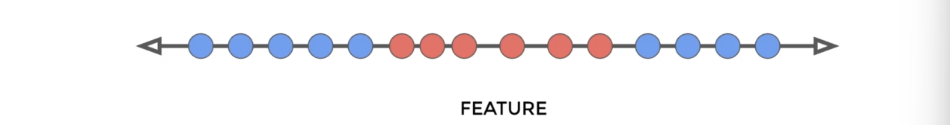


### Can't split classes with hyperplane line:
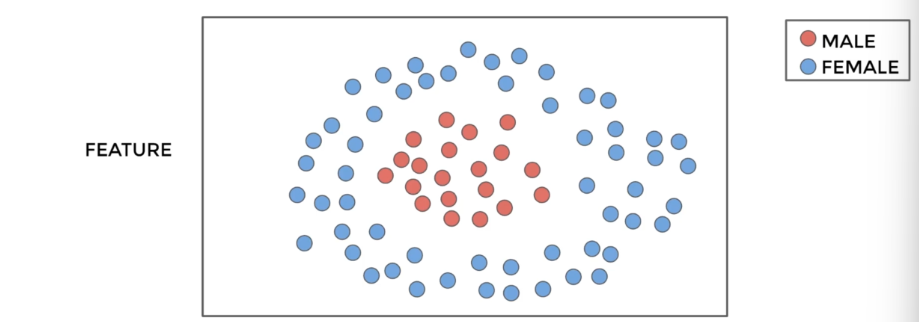 
- To solve these cases, we move on from Support Vector Classifier, to Support Vector Machines
- SVMs use <code>kernels</code> to project the data to a higher dimension, in order to use a hyperplane in this higher dimension to separate the data

# Support Vector Machine - Kernels
* Kernels allow us to move beyond a Support Vector Classifier and use Support Vector Machines.
* There are a variety of Kernels we can use to "project" the features to a higher dimension.
* Let's explore how this works through some visual examples...
* Recall our 1D example of classes not easily separated by a single hyperplane:
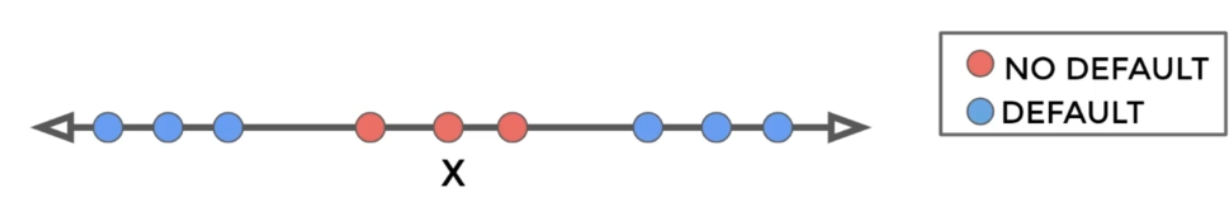
* let's explore how using a kernel could project this feature onto another dimension

* For Example, a <code>polynomial kernel</code> could expand onto an $ X^2 $ dimension:
* Create a hyperplane after this projection:
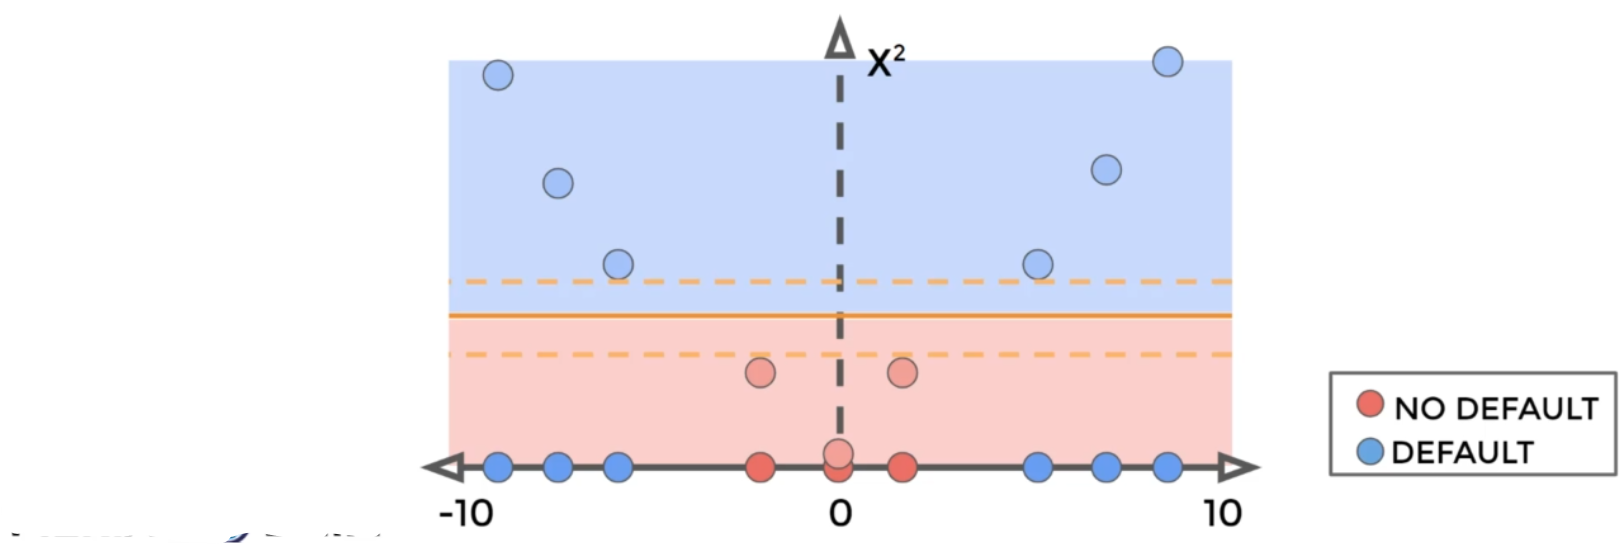
* Use Kernel projection to evaluate new points.

* Imagine a <code>2D feature space</code> where a hyperplane cannot separate effectively, even with soft margins.
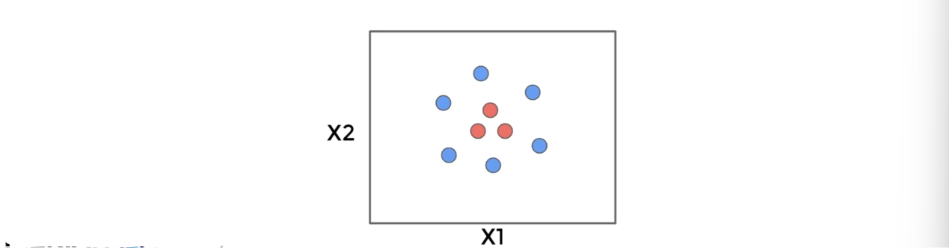

* We use support Vector Machines to enable the use of Kernel transformation to project to a higher dimension. <code> 2D to 3D </code>
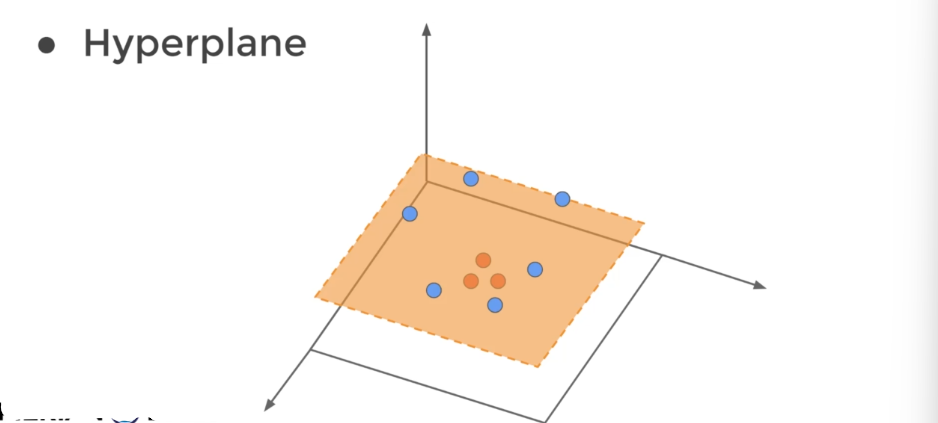


# Kernel Trick & Math

* In 2D space Hyperplanes can be defined as line as we know the equation of line

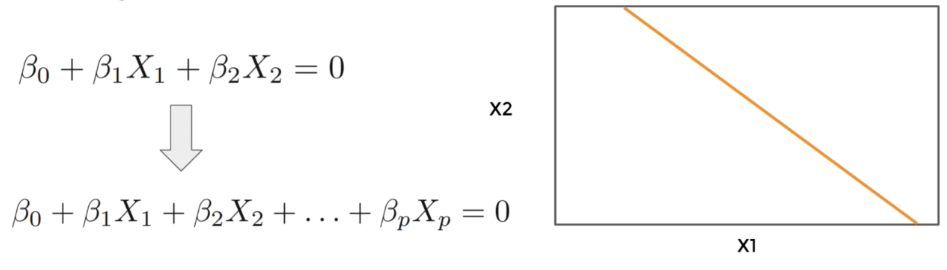
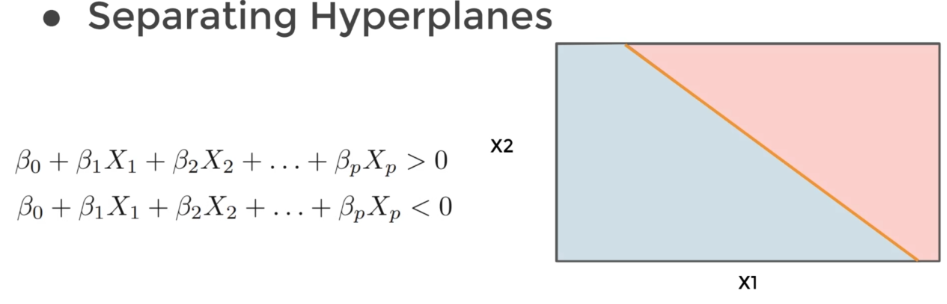

---
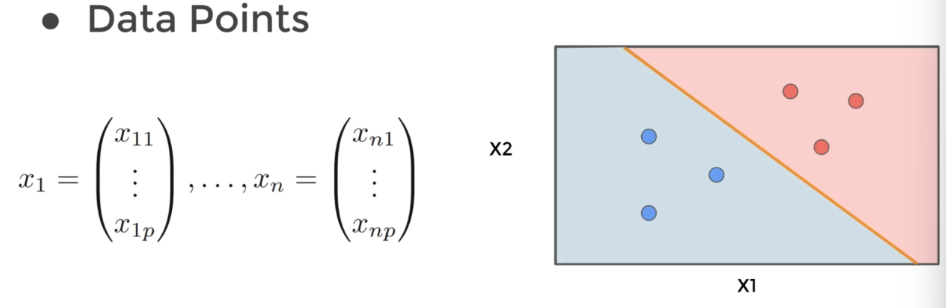
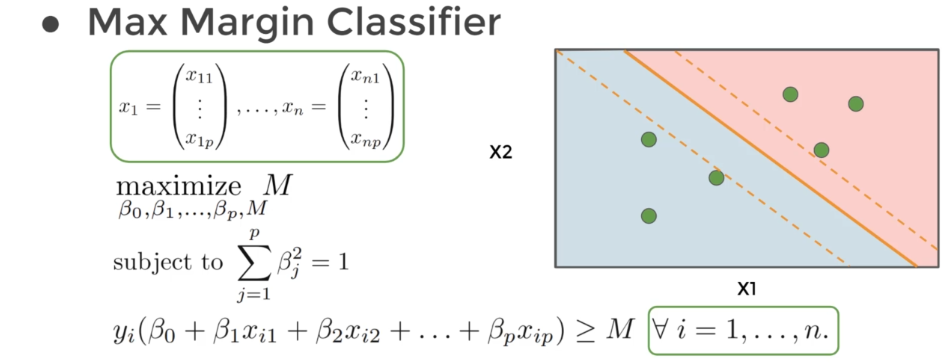

---
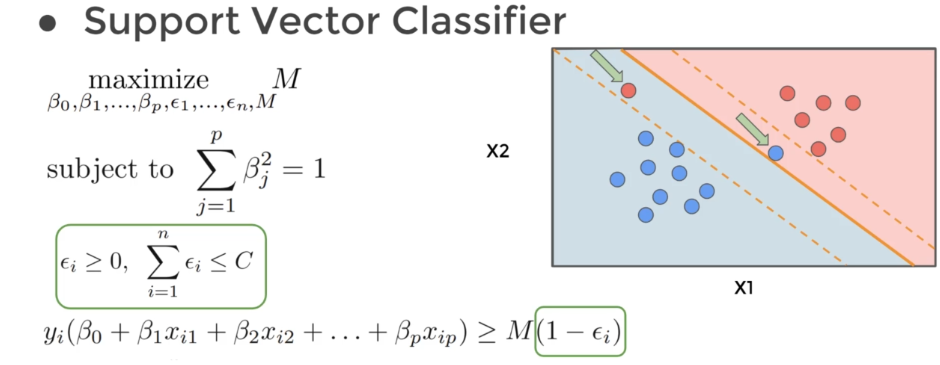

---
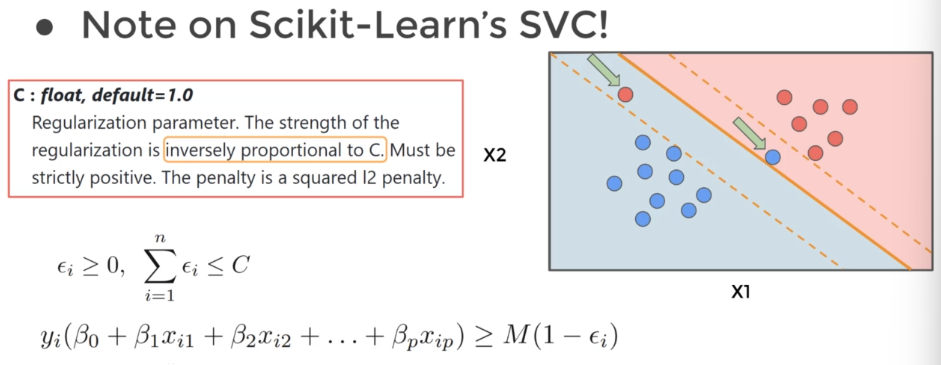

---
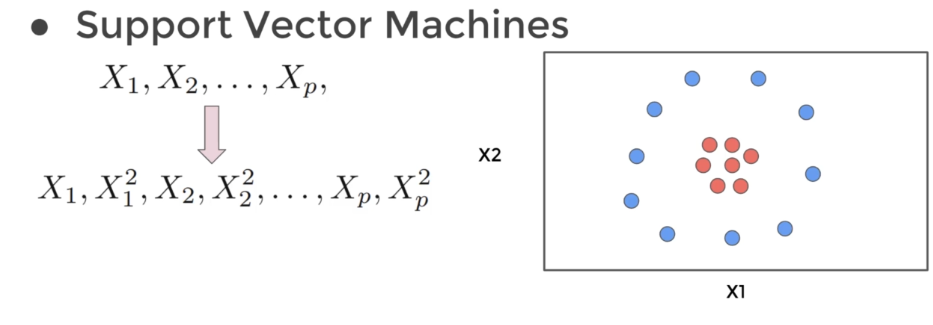
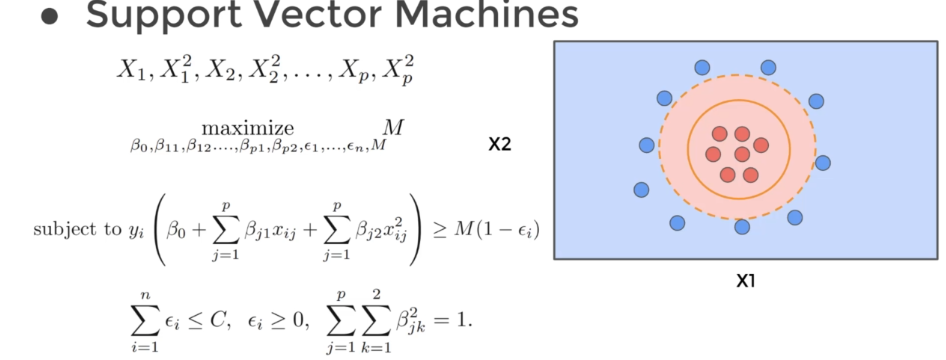


* How to deal with very large feature space?
* As polynomial order grows larger, the number of computations necessary to solve for margins also grows !
* The answer lies in the <code>kernel trick</code> which makes use of the <code>inner product</code> of vectors, also known as the <code>dot product</code>

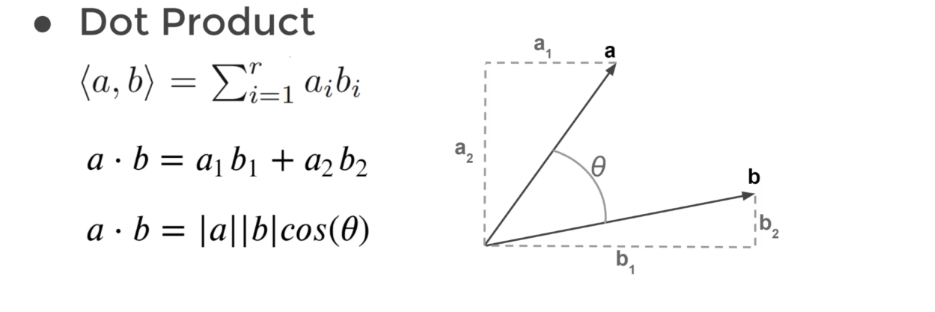
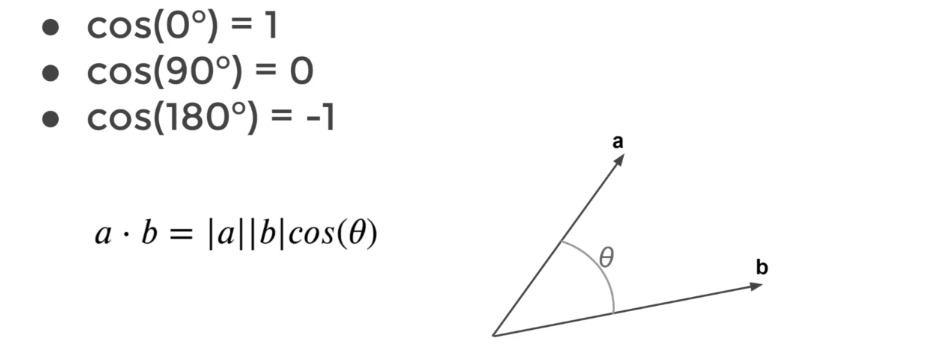

--- 
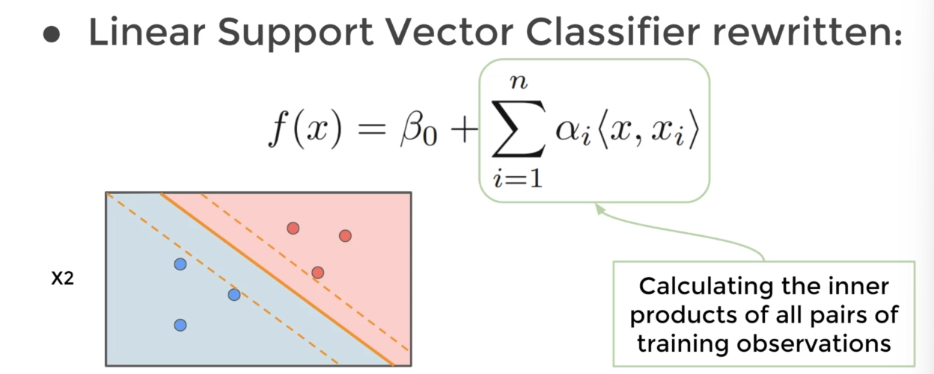
</br>
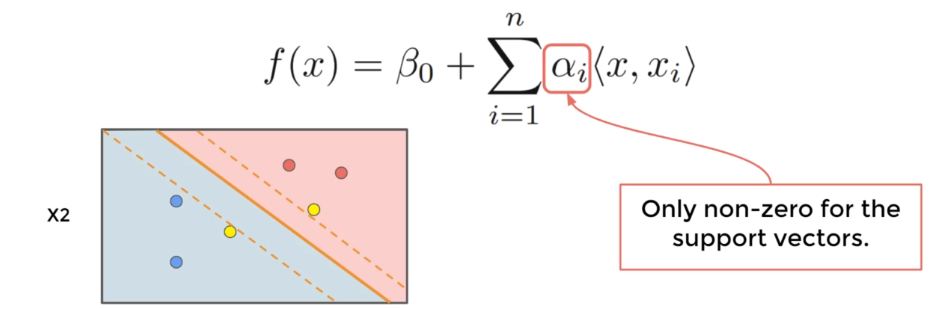

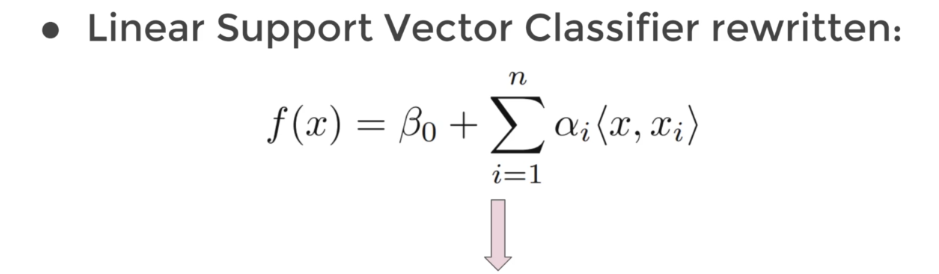
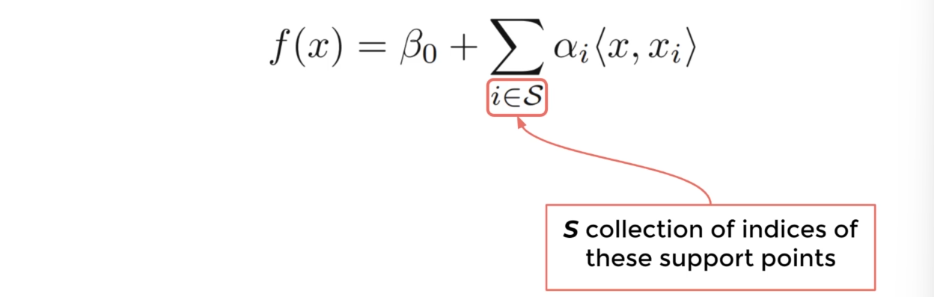

## kernel Function
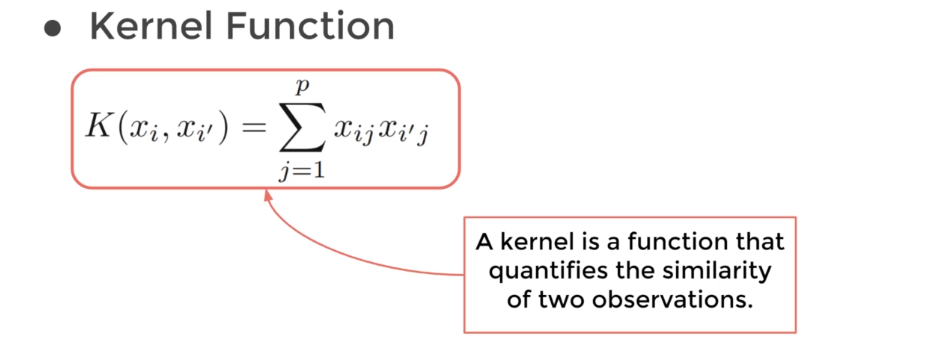
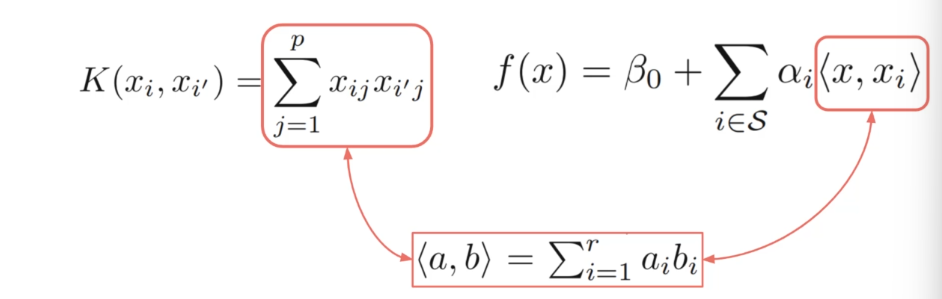

---
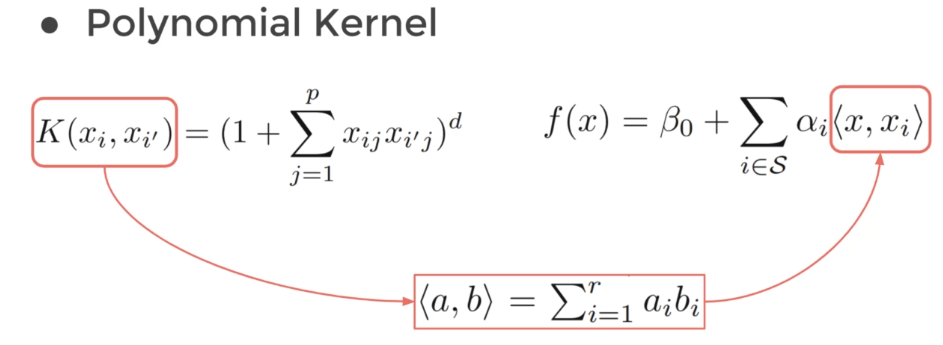

---
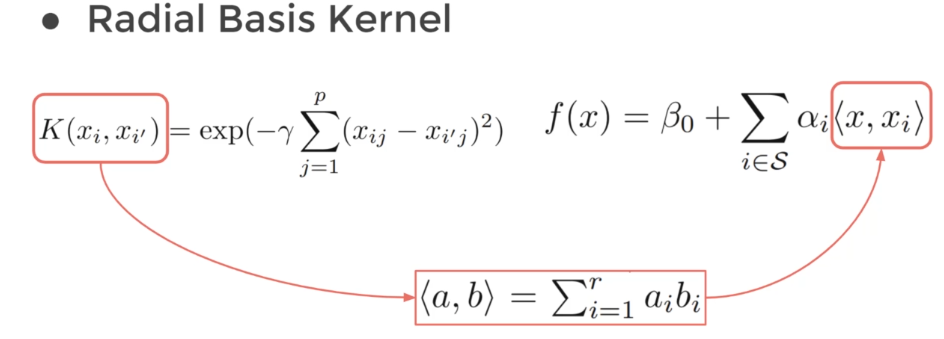

* The use of <code>kernels</code> as a replacement if known as the <code>kernel trick.</code>
* Kernels allow us to avoid computations in the enlarged feature space, by only needing to perform computations for each distinct pair of training points.
* Intuitively we've already seen inner products act as a measurement of similarity between vectors.
* The use of kernels can be thought of as a measure of similarity between the original feature space and the enlarged feature space.